# Nasalización ML

---
---
## Import libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import os

---
---
## Loading the data

Se cargan los datos del excel generado con Matlab.

In [6]:
path_data = r"D:\OneDrive\nasalizacion\audiosAnotadosDDBB" 
# la r delantera es para usar rawString, usar \ en vez de tener que escribir cada vez \\.

In [7]:
name_data = "audiosBalanceados200_mfcc39"

In [8]:
df = pd.read_csv(os.path.join(path_data, name_data+'.csv'), delimiter = ',')

In [9]:
df.head()

,Row,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,...,deltaDelta3,deltaDelta4,deltaDelta5,deltaDelta6,deltaDelta7,deltaDelta8,deltaDelta9,deltaDelta10,deltaDelta11,deltaDelta12
0,revisados_AguilarJimenez_Vanero_w000001_SL,-0.154322,4.283002,-0.183202,0.562824,0.435947,0.498896,0.164709,0.122740,0.342607,...,0.010006,0.007750,0.008869,0.002928,0.002182,0.006091,-0.000350,0.005644,-0.005749,-0.004136
1,revisados_AguilarJimenez_Vanero_w000002_SL,-0.449335,3.925621,-0.471724,0.380736,0.174109,0.582583,0.435990,0.265222,-0.138582,...,0.021777,0.014721,0.023661,0.012143,0.007988,0.006673,0.003322,0.015397,-0.013076,-0.009520
2,revisados_AguilarJimenez_Vanero_w000003_SL,-0.837710,4.287087,-0.380308,0.036878,0.194451,0.373683,0.541881,0.430390,0.179712,...,0.026443,0.020209,0.036037,0.025835,0.018133,0.009016,0.003005,0.025411,-0.022459,-0.012947
3,revisados_AguilarJimenez_Vanero_w000004_SL,-1.408038,3.971979,0.403533,0.040975,-0.275404,0.375629,0.569952,0.465709,0.013315,...,0.024795,0.014813,0.043912,0.040354,0.029851,0.008793,0.001167,0.032850,-0.022693,-0.017073
4,revisados_AguilarJimenez_Vanero_w000005_SL,-2.035720,3.313075,0.276838,0.297700,-0.105270,0.607505,0.597857,0.434183,0.291487,...,0.022124,0.004899,0.049687,0.052398,0.039351,0.011256,0.004653,0.032116,-0.019947,-0.016409


Vemos el número de filas y columnas, y si existe algún valor null o vacío en los datos

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498470 entries, 0 to 498469
Data columns (total 40 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Row           498470 non-null  object 
 1   mfcc0         498470 non-null  float64
 2   mfcc1         498470 non-null  float64
 3   mfcc2         498470 non-null  float64
 4   mfcc3         498470 non-null  float64
 5   mfcc4         498470 non-null  float64
 6   mfcc5         498470 non-null  float64
 7   mfcc6         498470 non-null  float64
 8   mfcc7         498470 non-null  float64
 9   mfcc8         498470 non-null  float64
 10  mfcc9         498470 non-null  float64
 11  mfcc10        498470 non-null  float64
 12  mfcc11        498470 non-null  float64
 13  mfcc12        498470 non-null  float64
 14  delta0        498470 non-null  float64
 15  delta1        498470 non-null  float64
 16  delta2        498470 non-null  float64
 17  delta3        498470 non-null  float64
 18  delt

In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mfcc0,498470.0,-3.213016,3.893784,-15.107440,-6.039960,-2.884117,0.127362,5.519831
mfcc1,498470.0,2.788160,1.520643,-3.419286,1.644495,2.995123,3.974009,6.930348
mfcc2,498470.0,0.047564,0.827073,-3.623499,-0.496126,0.094494,0.593407,4.018796
mfcc3,498470.0,0.833921,0.855397,-2.360179,0.210019,0.699622,1.404331,4.374446
mfcc4,498470.0,-0.093042,0.547496,-2.989511,-0.422132,-0.038972,0.271816,2.508041
mfcc5,498470.0,0.091709,0.438995,-1.850145,-0.191890,0.084732,0.368561,2.207615
mfcc6,498470.0,-0.093064,0.428754,-2.388133,-0.368686,-0.078504,0.187328,2.015492
mfcc7,498470.0,0.040190,0.362530,-1.936636,-0.181693,0.056733,0.279768,1.785590
mfcc8,498470.0,0.016257,0.342307,-1.722372,-0.206483,0.021997,0.241973,1.664381
mfcc9,498470.0,0.021349,0.305846,-1.940358,-0.180226,0.020468,0.221796,1.512213


---
---
# Data Preprocessing

Vamos a transformar la primera columna Row para obtener más información sobre los hablantes

In [9]:
df.head()

,Row,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,...,deltaDelta3,deltaDelta4,deltaDelta5,deltaDelta6,deltaDelta7,deltaDelta8,deltaDelta9,deltaDelta10,deltaDelta11,deltaDelta12
0,revisados_AguilarJimenez_Vanero_w000001_SL,-0.154322,4.283002,-0.183202,0.562824,0.435947,0.498896,0.164709,0.122740,0.342607,...,0.010006,0.007750,0.008869,0.002928,0.002182,0.006091,-0.000350,0.005644,-0.005749,-0.004136
1,revisados_AguilarJimenez_Vanero_w000002_SL,-0.449335,3.925621,-0.471724,0.380736,0.174109,0.582583,0.435990,0.265222,-0.138582,...,0.021777,0.014721,0.023661,0.012143,0.007988,0.006673,0.003322,0.015397,-0.013076,-0.009520
2,revisados_AguilarJimenez_Vanero_w000003_SL,-0.837710,4.287087,-0.380308,0.036878,0.194451,0.373683,0.541881,0.430390,0.179712,...,0.026443,0.020209,0.036037,0.025835,0.018133,0.009016,0.003005,0.025411,-0.022459,-0.012947
3,revisados_AguilarJimenez_Vanero_w000004_SL,-1.408038,3.971979,0.403533,0.040975,-0.275404,0.375629,0.569952,0.465709,0.013315,...,0.024795,0.014813,0.043912,0.040354,0.029851,0.008793,0.001167,0.032850,-0.022693,-0.017073
4,revisados_AguilarJimenez_Vanero_w000005_SL,-2.035720,3.313075,0.276838,0.297700,-0.105270,0.607505,0.597857,0.434183,0.291487,...,0.022124,0.004899,0.049687,0.052398,0.039351,0.011256,0.004653,0.032116,-0.019947,-0.016409


La información sobre los hablantes está incluida en la columna Row. Se extrae esta información para generar nuevas columnas.

<table border="1" class="dataframe" align="left">
    
  <thead>
    <tr style="text-align: center;">
      <th></th>
      <th>Código</th>
      <th>Descripción</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>revisados</td>
      <td>Es sólo un código de las carpetas de Matlab, se ignora.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>AguilarJimenez</td>
      <td>Apellidos del hablante.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Vanero</td>
      <td>Código con el texto leído, hay un total de 4 textos diferentes.</td>
    </tr>
    <tr>
      <th>3</th>
      <td>w000001</td>
      <td>Posición de la ventana en el audio completo, crece secuencialmente.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>SL</td>
      <td>Clase asignada a la ventana.</td>
    </tr>
  </tbody>
</table>

Si el resultado de esta celda es 5.0 significa que todos los audios están ok.

In [8]:
row_split = df['Row'].apply(lambda x: x.split('_'))
np.mean(row_split.apply(len))
# Algunos de los nombres no están bien puestos, tienen más de 5 partes, hay que corregirlos

5.0

Preprocesamiento de las clases

In [9]:
def data_preprocessing(df):
    
    # hay diferentes tipos de clases que podemos clasificar OV, OC, SL, NC, NV 
    df['class'] = df['Row'].apply(lambda x: x.split('_')[-1])
    
    df['class_four'] = df['class'].map({'OV': 'OV', 'OC': 'OC',
                                        'NC': 'NC', 'NV': 'NV'})    
    
    df['silence0_sound1'] = df['class'].map({'SL': '0', 'OV': '1', 'OC': '1', 'NC': '1', 'NV': '1'})
    df['silence_nasal_oral'] = df['class'].map({'SL': 'silence', 'OV': 'oral', 'OC': 'oral', 'NC': 'nasal', 'NV': 'nasal'})
    
    df['vowel0_consonant1'] = df['class'].map({'OV': '0', 'OC': '1', 'NC': '1', 'NV': '0'})
    df['ov0_oc1'] = df['class'].map({'OV': '0', 'OC': '1'})
    df['nv0_nc1'] = df['class'].map({'NV': '0', 'NC': '1'})

    df['oral0_nasal1'] = df['class'].map({'OV': '0', 'OC': '0', 'NC': '1', 'NV': '1'})
    df['ov0_nv1'] = df['class'].map({'OV': '0', 'NV': '1'})
    df['oc0_nc1'] = df['class'].map({'OC': '0', 'NC': '1'})

    
    df['window'] = df['Row'].apply(lambda x: x.split('_')[-2])
    
    # identificador del audio que dicen
    df['text'] = df['Row'].apply(lambda x: x.split('_')[-3])
    df['text'] = df['text'].replace({'Vanero':'Joyero', 'HOM':'Joyero', 'joyero':'Joyero',
                                 'VientoN':'Viento', 'VientoV':'Viento', 'ElViento':'Viento',
                                 'HayAlgo':'HayAlgoAhi', 'hayAlgo':'HayAlgoAhi'
                                })
    
    df['speaker'] = df['Row'].apply(lambda x: ''.join(x.split('_')[1:-3])) # evita errores con nombres duplicados
    
    return df

In [10]:
df = data_preprocessing(df)
df.head()

,Row,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,...,silence_nasal_oral,vowel0_consonant1,ov0_oc1,nv0_nc1,oral0_nasal1,ov0_nv1,oc0_nc1,window,text,speaker
0,revisados_AguilarJimenez_Vanero_w000001_SL,-0.154322,4.283002,-0.183202,0.562824,0.435947,0.498896,0.164709,0.122740,0.342607,...,silence,NaN,NaN,NaN,NaN,NaN,NaN,w000001,Joyero,AguilarJimenez
1,revisados_AguilarJimenez_Vanero_w000002_SL,-0.449335,3.925621,-0.471724,0.380736,0.174109,0.582583,0.435990,0.265222,-0.138582,...,silence,NaN,NaN,NaN,NaN,NaN,NaN,w000002,Joyero,AguilarJimenez
2,revisados_AguilarJimenez_Vanero_w000003_SL,-0.837710,4.287087,-0.380308,0.036878,0.194451,0.373683,0.541881,0.430390,0.179712,...,silence,NaN,NaN,NaN,NaN,NaN,NaN,w000003,Joyero,AguilarJimenez
3,revisados_AguilarJimenez_Vanero_w000004_SL,-1.408038,3.971979,0.403533,0.040975,-0.275404,0.375629,0.569952,0.465709,0.013315,...,silence,NaN,NaN,NaN,NaN,NaN,NaN,w000004,Joyero,AguilarJimenez
4,revisados_AguilarJimenez_Vanero_w000005_SL,-2.035720,3.313075,0.276838,0.297700,-0.105270,0.607505,0.597857,0.434183,0.291487,...,silence,NaN,NaN,NaN,NaN,NaN,NaN,w000005,Joyero,AguilarJimenez


Las clases no están balanceadas, las vocales nasales (NV) están menos representadas.

<AxesSubplot:xlabel='class', ylabel='Count'>

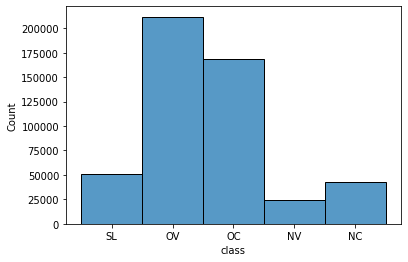

In [11]:
sns.histplot(data=df, x='class')

En porcentaje se puede ver que un 40% de las ventansa son vocales orales, y hasta un 75% del total son orales (consonantes y vocales).

In [99]:
df['class'].value_counts()

OV    211771
OC    168701
SL     50862
NC     42996
NV     24140
Name: class, dtype: int64

In [13]:
df['class'].value_counts()/len(df['class'])*100

OV    42.484202
OC    33.843762
SL    10.203623
NC     8.625594
NV     4.842819
Name: class, dtype: float64

Los textos que se van a utilizar, no están balanceados en longitud, y hay algunos que no están correctamente etiquetados.

Si el resultado de esta celda es 5.0 significa que TODOS los audios están BIEN etiquetados.

In [101]:
df['text'].value_counts()

Joyero        181244
HayAlgoAhi    133781
Viento        129011
CuandoA        54434
Name: text, dtype: int64

Al preprocesar los datos se generan nuevas columnas con la clase, ventana y el texto que se graba, etc...

Text(0, 0.5, 'Nº de ventanas')

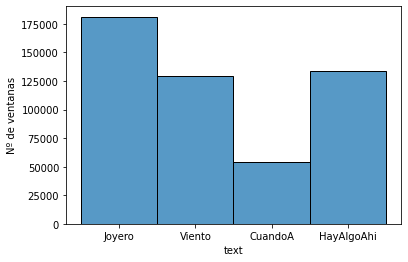

In [102]:
sns.histplot(data=df, x='text')
plt.ylabel('Nº de ventanas')
# El número de ventanas en cada uno de los textos es diferente, pero eso significa que no tienen la misma longitud, ¿o que unos se repiten más que otros?

In [103]:
joint_name = df["text"] + "_" + df["speaker"]
joint_name.unique()[0:10]

array(['Joyero_AguilarJimenez', 'Joyero_AguirreNaranjo',
       'Joyero_AibarBautista', 'Viento_AlLolGonzalez',
       'Joyero_AlbaRubiales', 'Joyero_Alba', 'Viento_AlcarazPaniagua',
       'CuandoA_ArizaMolina', 'HayAlgoAhi_ArizaMolina',
       'Joyero_ArizaMolina'], dtype=object)

Joyero        86
Viento        58
HayAlgoAhi    38
CuandoA       15
dtype: int64


<AxesSubplot:xlabel='0'>

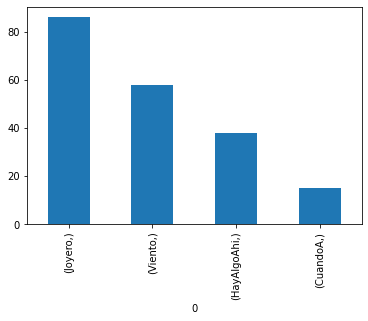

In [104]:
unique_text = pd.DataFrame([t.split('_')[0] for t in joint_name.unique()])
print(unique_text.value_counts())
unique_text.value_counts().plot.bar()

Los textos se repiten de forma diferente. ¿Cada hablante graba un único textos, o alguno graba varios?

Desconocida009           4
RuizRodriguez            4
Deconocida008            4
CriadoFernandez          4
ArizaMolina              4
                        ..
PascualArevalo           1
PastorHernandezPinzon    1
PenuelaRecio             1
PeraltaRuiz              1
AguilarJimenez           1
Length: 134, dtype: int64


Text(0, 0.5, 'Nº de hablantes')

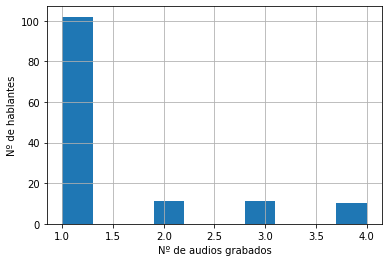

In [105]:
unique_speaker = pd.DataFrame([t.split('_')[1] for t in joint_name.unique()])
print(unique_speaker.value_counts())
unique_speaker.value_counts().hist()
plt.xlabel('Nº de audios grabados')
plt.ylabel('Nº de hablantes')

Hay varios hablantes que han grabado 2, 3 y 4 audios.

Sobre los hablantes

In [106]:
unique_speaker = len(df["speaker"].unique())
print(f"Hay {unique_speaker} hablantes diferentes.")

Hay 134 hablantes diferentes.


In [107]:
joint_name = df["text"] + "_" + df["speaker"]

Text(0.5, 1.0, 'Distribución de ventanas por hablante')

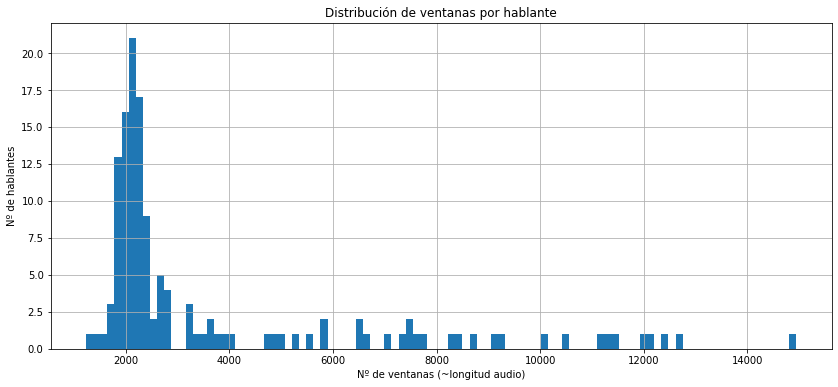

In [108]:
plt.figure(figsize=(14,6))
df['speaker'].value_counts().hist(bins=100)
plt.xlabel('Nº de ventanas (~longitud audio)')
plt.ylabel('Nº de hablantes')
plt.title('Distribución de ventanas por hablante')

Estos son los hablantes que más ventanas han generado

In [109]:
df['speaker'].value_counts().head(15)

Desconocida009      14942
GioveMeschian       12628
MeschianCoretti     12395
Deconocida008       12116
Desconocida010      11958
RuizRodriguez       11438
CriadoFernandez     11360
CoronaRodriguez     11229
ArizaMolina         10454
GarciaMarin         10029
Desconocida007       9208
JimenezMercedes      9123
DeograciaElena       8695
JimenezOrtega        8420
CatedraMargarita     8236
Name: speaker, dtype: int64

---
---
# Exploratory Data Analysis


La distribución de las clases es desbalanceada

<AxesSubplot:xlabel='class', ylabel='Count'>

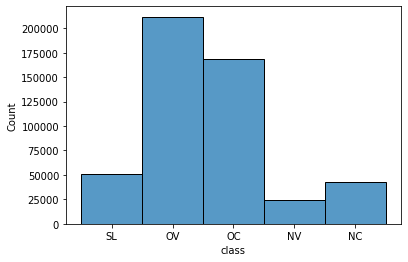

In [110]:
sns.histplot(data=df, x='class')

Se definen 3 conjuntos de parámetros diferenciados: mfcc, delta y deltaDelta

In [11]:
# print(df.columns)
mfcc_names = list(df.columns[1:14])
delta_names = list(df.columns[14:27])
deltaDelta_names = list(df.columns[27:40])

print(f'MFCC params: {mfcc_names}')
print(f'Delta params: {delta_names}')
print(f'DeltaDelta params: {deltaDelta_names}')

MFCC params: ['mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12']
Delta params: ['delta0', 'delta1', 'delta2', 'delta3', 'delta4', 'delta5', 'delta6', 'delta7', 'delta8', 'delta9', 'delta10', 'delta11', 'delta12']
DeltaDelta params: ['deltaDelta0', 'deltaDelta1', 'deltaDelta2', 'deltaDelta3', 'deltaDelta4', 'deltaDelta5', 'deltaDelta6', 'deltaDelta7', 'deltaDelta8', 'deltaDelta9', 'deltaDelta10', 'deltaDelta11', 'deltaDelta12']


Vamos a explorar la correlación entre los parámetros

Text(0.5, 1.0, 'Correlación mfcc')

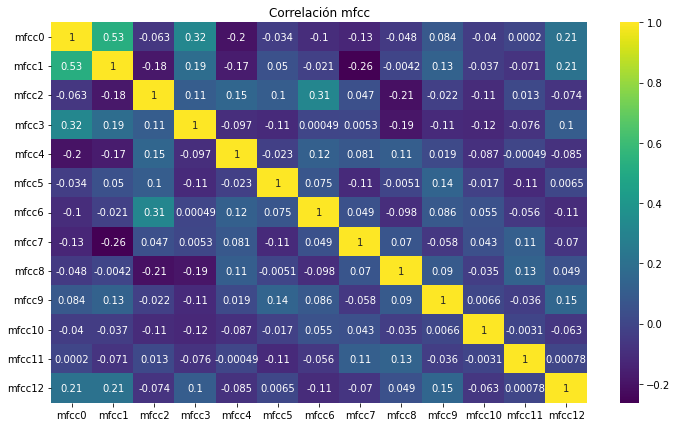

In [126]:
plt.figure(figsize=(12,7))
sns.heatmap(df[mfcc_names].corr(),annot=True,cmap='viridis')
plt.title('Correlación mfcc')

Text(0.5, 1.0, 'Correlación delta')

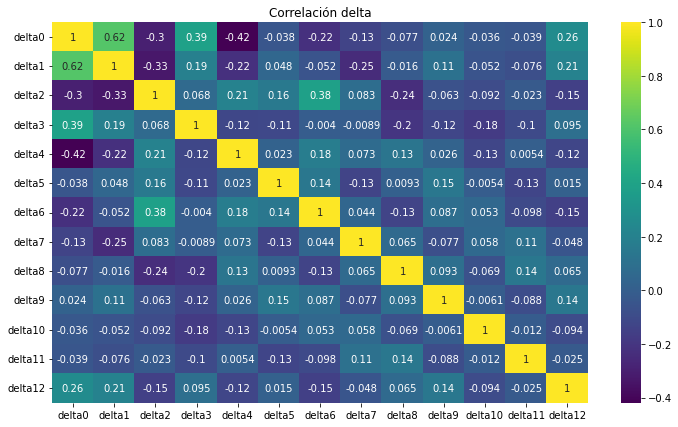

In [127]:
plt.figure(figsize=(12,7))
sns.heatmap(df[delta_names].corr(),annot=True,cmap='viridis')
plt.title('Correlación delta')

Text(0.5, 1.0, 'Correlación deltaDelta')

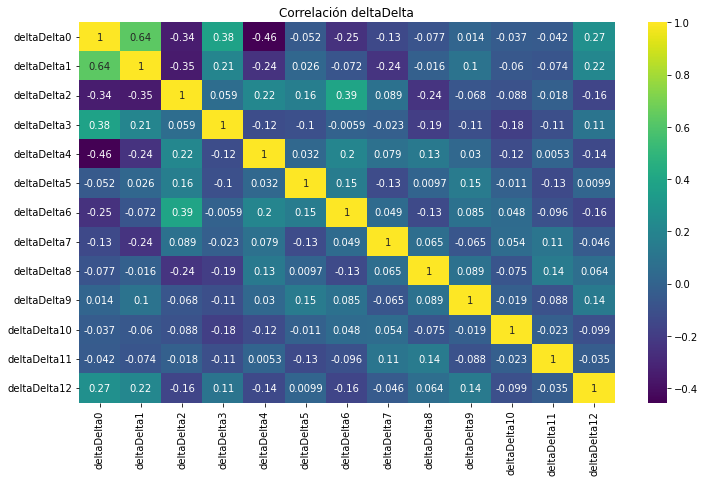

In [128]:
plt.figure(figsize=(12,7))
sns.heatmap(df[deltaDelta_names].corr(),annot=True,cmap='viridis')
plt.title('Correlación deltaDelta')

In [ ]:
deltaDelta_names

['deltaDelta0',
 'deltaDelta1',
 'deltaDelta2',
 'deltaDelta3',
 'deltaDelta4',
 'deltaDelta5',
 'deltaDelta6',
 'deltaDelta7',
 'deltaDelta8',
 'deltaDelta9',
 'deltaDelta10',
 'deltaDelta11',
 'deltaDelta12']

(delta_names + deltaDelta_names)Se da el caso de que las delta y las deltaDelta sí que se tienen una alta correlación

**¿Podríamos descartar los deltaDelta?**

Text(0.5, 1.0, 'Correlación delta y deltaDelta')

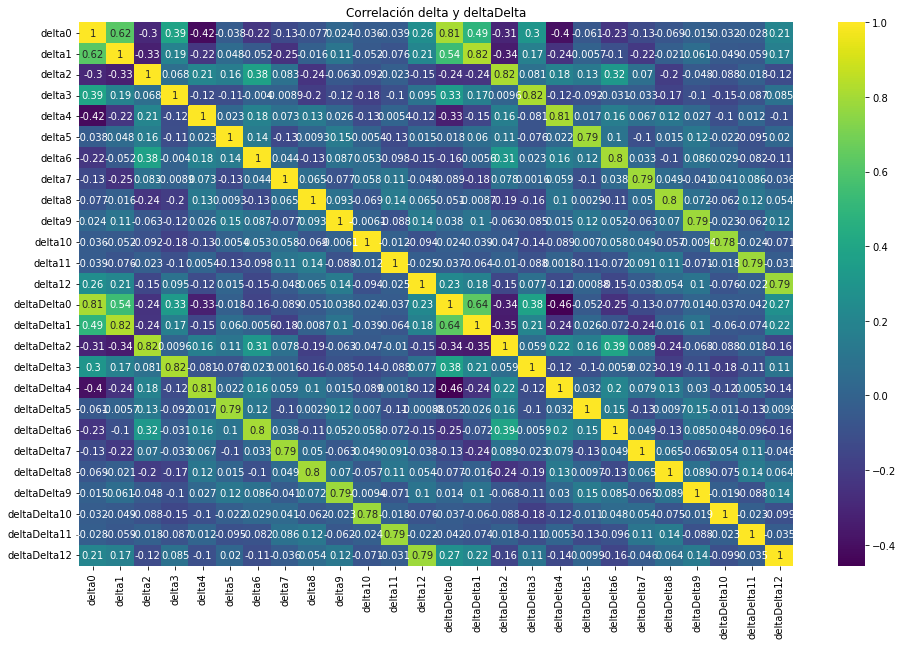

In [131]:
plt.figure(figsize=(16,10))
sns.heatmap(df[delta_names + deltaDelta_names].corr(),annot=True,cmap='viridis')
plt.title('Correlación delta y deltaDelta')

<AxesSubplot:xlabel='class', ylabel='mfcc0'>

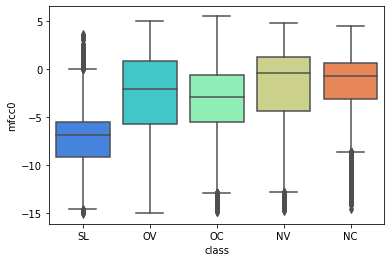

In [33]:
sns.boxplot(x="class", y="mfcc0", data=df, palette='rainbow')

<AxesSubplot:xlabel='mfcc0', ylabel='Density'>

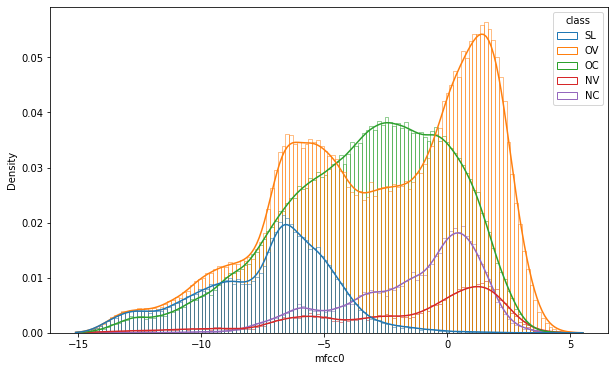

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='mfcc0', hue='class', kde=True, stat='density', fill=False)

<AxesSubplot:xlabel='mfcc1', ylabel='Density'>

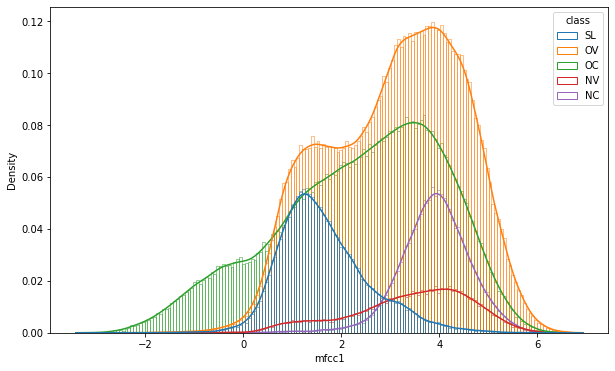

In [100]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='mfcc1', hue='class', kde=True, stat='density', fill=False)

---
---
# Preprocessing and missing data


No hay valores null en el dataframe

In [35]:
df.isnull().sum()

Row                       0
mfcc0                     0
mfcc1                     0
mfcc2                     0
mfcc3                     0
mfcc4                     0
mfcc5                     0
mfcc6                     0
mfcc7                     0
mfcc8                     0
mfcc9                     0
mfcc10                    0
mfcc11                    0
mfcc12                    0
delta0                    0
delta1                    0
delta2                    0
delta3                    0
delta4                    0
delta5                    0
delta6                    0
delta7                    0
delta8                    0
delta9                    0
delta10                   0
delta11                   0
delta12                   0
deltaDelta0               0
deltaDelta1               0
deltaDelta2               0
deltaDelta3               0
deltaDelta4               0
deltaDelta5               0
deltaDelta6               0
deltaDelta7               0
deltaDelta8         

Se van a descartar las columnas que no nos aportan información para la clasificación

---
---
# Classification functions

In [12]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

In [13]:
def calculate_k_fold(df_in, k_fold, speaker_names, function_model):

    if k_fold == 1:
        kf = KFold(n_splits=5, shuffle=True, random_state = 42)
    else:
        kf = KFold(n_splits=k_fold, shuffle=True, random_state = 42)
        

    print("Calculando k-fold:\n")
    for n_fold, (train_index, val_index) in enumerate(kf.split(speaker_names)): # train_index, val_index in kf.split(patient_names):

        # Se separan por apellidos
        df_train = df_in[pd.DataFrame(df_in['speaker'].tolist()).isin(speaker_names[train_index]).any(1).values]
        df_val = df_in[pd.DataFrame(df_in['speaker'].tolist()).isin(speaker_names[val_index]).any(1).values]

        # Se generan los datos
        X_train = df_train.drop(['class','speaker'],axis=1)
        X_val = df_val.drop(['class','speaker'],axis=1)

        y_train = df_train['class'].to_numpy()
        y_val = df_val['class'].to_numpy()

        # Normalización
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

        # Instancia del modelo
        model = function_model()

        # Entrenamiento y evaluación
        model.fit(X_train,y_train)
        model_pred = model.predict(X_val)

        print(f'Fold {n_fold + 1}') 
        
        if k_fold == 1: 
            break
        
    print('Fin de k-fold')
    
    return model, y_val, model_pred
    
# end def

In [14]:
def plot_sorted_feature_importance(df_in, model_in):
    
    feature_names = df_in.drop(['class','speaker'],axis=1).columns
    feature_import_df = pd.DataFrame({'feature': feature_names, 'importance': model_in.feature_importances_})
    
    plt.figure(figsize = (12, 8))
    df_sorted = feature_import_df.sort_values('importance', ascending = False)
    import_threshold = 10
    df_sorted.head(20).plot(x = 'feature', y = 'importance', kind = 'barh',
                     color = 'red', edgecolor = 'k', title = 'Top 20 Feature Importances',);
    return df_sorted

In [16]:
def show_confusion_matrix(cf_matrix, class_names):
    plt.figure(figsize=(10,6))

    row_sum = np.sum(cf_matrix,axis=1).reshape(-1, 1)
    s = sns.heatmap(cf_matrix/row_sum, 
                fmt='.2%', annot=True, cmap='Greens', 
                yticklabels=class_names, xticklabels=class_names)

    s.set_ylabel('True Label', fontsize=14)
    s.set_xlabel('Predicted Label', fontsize=14)

In [17]:
def acc_by_class(cf_matrix,class_names):
    acc_class = cf_matrix.diagonal()/cf_matrix.sum(axis=1)

    print('Accuracy por clases:\n')
    for label,acc_value in zip(class_names,acc_class):
        print(f'{label}: {acc_value*100:.2f} %')

    #(cf_matrix.diagonal()/cf_matrix.sum(axis=1)).apply(lambda x: print(x))

In [18]:
def show_results_class(df_in, model, y_val, y_pred, c_names):
    cf_matrix = confusion_matrix(y_val, y_pred, labels=c_names)
    
    print(' --------------- Validation data ------------------')
    print(cf_matrix)
    print('\t')
    print(classification_report(y_val, y_pred, labels=c_names))

    print('\t')
    print(' --------------- Matriz de confusión ------------------')
    show_confusion_matrix(cf_matrix, class_names)

    print('\t')
    acc_by_class(cf_matrix,class_names)
    
       
    try: 
        print('\t')
        print(' --------------- Importancia descriptores ------------------')
        feature_import_df_sorted = plot_sorted_feature_importance(df_in, model)
        print(feature_import_df_sorted)
    except:
        print("El modelo no implementa feature_importance")
    # end try
# end def

---
---
# Classification with all 5 classes

In [18]:
print(df.columns) # mfcc_names delta_names deltaDelta_names

Index(['Row', 'mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
       'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'delta0',
       'delta1', 'delta2', 'delta3', 'delta4', 'delta5', 'delta6', 'delta7',
       'delta8', 'delta9', 'delta10', 'delta11', 'delta12', 'deltaDelta0',
       'deltaDelta1', 'deltaDelta2', 'deltaDelta3', 'deltaDelta4',
       'deltaDelta5', 'deltaDelta6', 'deltaDelta7', 'deltaDelta8',
       'deltaDelta9', 'deltaDelta10', 'deltaDelta11', 'deltaDelta12', 'class',
       'class_four', 'silence0_sound1', 'vowel0_consonant1', 'ov0_oc1',
       'nv0_nc1', 'oral0_nasal1', 'ov0_nv1', 'oc0_nc1', 'window', 'text',
       'speaker'],
      dtype='object')


### Hay que seleccionar que tipo de clase vamos a emplear

In [21]:
columns_to_copy = mfcc_names + delta_names + ['speaker'] + ['class']

print(columns_to_copy)

['mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'delta0', 'delta1', 'delta2', 'delta3', 'delta4', 'delta5', 'delta6', 'delta7', 'delta8', 'delta9', 'delta10', 'delta11', 'delta12', 'speaker', 'class']


In [22]:
df_redux = df[columns_to_copy].copy()

df_redux.columns = [*df_redux.columns[:-1], 'class'] # last columns always has name class
df_redux.dropna(axis=0, inplace=True)
df_redux.head()

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,delta5,delta6,delta7,delta8,delta9,delta10,delta11,delta12,speaker,class
0,-0.154322,4.283002,-0.183202,0.562824,0.435947,0.498896,0.164709,0.122740,0.342607,-0.019678,...,0.066519,0.021961,0.016365,0.045681,-0.002624,0.042330,-0.043119,-0.031021,AguilarJimenez,SL
1,-0.449335,3.925621,-0.471724,0.380736,0.174109,0.582583,0.435990,0.265222,-0.138582,0.216384,...,0.127567,0.074603,0.047637,0.015783,0.026883,0.083727,-0.065731,-0.048133,AguilarJimenez,SL
2,-0.837710,4.287087,-0.380308,0.036878,0.194451,0.373683,0.541881,0.430390,0.179712,-0.124792,...,0.141342,0.126830,0.092090,0.032944,0.003688,0.106623,-0.097588,-0.045491,AguilarJimenez,SL
3,-1.408038,3.971979,0.403533,0.040975,-0.275404,0.375629,0.569952,0.465709,0.013315,-0.060689,...,0.142921,0.164738,0.126906,0.021928,-0.006801,0.113960,-0.053359,-0.062108,AguilarJimenez,SL
4,-2.035720,3.313075,0.276838,0.297700,-0.105270,0.607505,0.597857,0.434183,0.291487,0.289598,...,0.162895,0.187368,0.141995,0.047558,0.031437,0.081155,-0.044359,-0.041707,AguilarJimenez,SL


In [23]:
print(f'Número de filas en data frame: {len(df_redux.index)} \nNúmero de filas eliminadas: {len(df.index)-len(df_redux.index)}')

Número de filas en data frame: 498470 
Número de filas eliminadas: 0


Peso de las clases

In [24]:
df_redux['class'].value_counts().sort_index(ascending=False)

SL     50862
OV    211771
OC    168701
NV     24140
NC     42996
Name: class, dtype: int64

In [25]:
class_data = df_redux['class']
class_names = df_redux['class'].unique().tolist()
class_names.sort()

dict_class_weight = dict(zip(class_names,compute_class_weight(class_weight='balanced', classes=class_names, y=class_data)))
dict_class_weight

{'NC': 2.3186808075169782,
 'NV': 4.129826014913007,
 'OC': 0.5909508538775704,
 'OV': 0.47076323009288334,
 'SL': 1.9600880814753647}

### Random Forest

In [389]:
from sklearn.ensemble import RandomForestClassifier

In [390]:
def create_rf_model():
    '''
    Create RandomForestClassifier for k-fold classification
    '''
    return RandomForestClassifier( # %%time n_estimators=1 --> 3 s 
            n_estimators=10,
            criterion='gini',
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1,
            min_weight_fraction_leaf=0.0,
            max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_impurity_split=None,
            bootstrap=True,
            oob_score=False,
            n_jobs=None,
            random_state=None,
            verbose=0,
            warm_start=False,
            class_weight= dict_class_weight, #None,
            ccp_alpha=0.0,
            max_samples=None
            ) 

In [391]:
k_fold = 1
speaker_names = df_redux['speaker'].unique()

In [393]:
#%%time
rf_model, rf_y_val, rf_model_pred = calculate_k_fold(df_redux, k_fold, speaker_names, function_model=create_rf_model)

Calculando k-fold:

Fold 1
Fin de k-fold
Wall time: 26 s


In [396]:
# rf_model, rf_y_val, rf_model_pred

 --------------- Validation data ------------------
[[ 4218   169  2163  1856    20]
 [  351   432   669  3368   208]
 [ 1254   121 23278  8090   464]
 [  719   449  8646 30501  2567]
 [   60    26  2086  4880  2783]]
	
              precision    recall  f1-score   support

          NC       0.64      0.50      0.56      8426
          NV       0.36      0.09      0.14      5028
          OC       0.63      0.70      0.66     33207
          OV       0.63      0.71      0.67     42882
          SL       0.46      0.28      0.35      9835

    accuracy                           0.62     99378
   macro avg       0.54      0.46      0.48     99378
weighted avg       0.60      0.62      0.60     99378

	
 --------------- Matriz de confusión ------------------
	
Accuracy por clases:

NC: 50.06 %
NV: 8.59 %
OC: 70.10 %
OV: 71.13 %
SL: 28.30 %
	
 --------------- Importancia descriptores ------------------
    feature  importance
1     mfcc1    0.109280
0     mfcc0    0.064446
3     mfcc3    

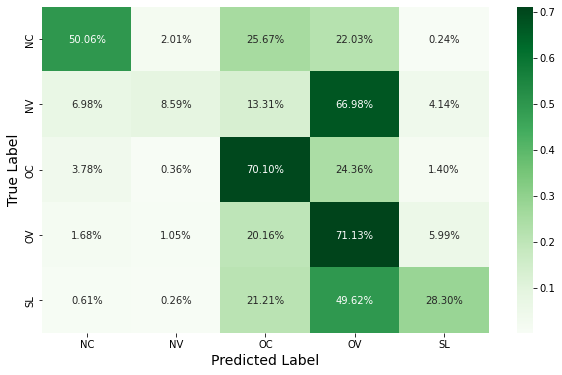

<Figure size 864x576 with 0 Axes>

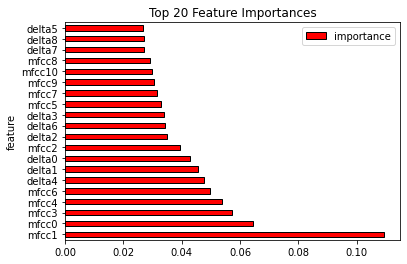

In [397]:
show_results_class(df_in=df_redux, model=rf_model, y_val=rf_y_val, y_pred=rf_model_pred, c_names=class_names)

### Stochastic Gradient Descent

In [398]:
from sklearn.linear_model import SGDClassifier

In [399]:
def create_sgd_model():
    '''
    Create Stochastic Gradient Descent for k-fold classification
    '''
    return SGDClassifier(
            loss='hinge',
            penalty='l2',
            alpha=0.0001,
            l1_ratio=0.15,
            fit_intercept=True,
            max_iter=100,#1000,
            tol=0.001,
            shuffle=True,
            verbose=0,
            epsilon=0.1,
            n_jobs=None,
            random_state=None,
            learning_rate='optimal',
            eta0=0.0,
            power_t=0.5,
            early_stopping=False,
            validation_fraction=0.1,
            n_iter_no_change=5,
            class_weight=dict_class_weight,#dict_class_weight, #None,
            warm_start=False,
            average=False
        )

In [400]:
k_fold = 1
speaker_names = df_redux['speaker'].unique()

In [401]:
%%time
sgd_model, sgd_y_val, sgd_model_pred = calculate_k_fold(df_redux, k_fold, speaker_names, function_model=create_sgd_model)

Calculando k-fold:

Fold 1
Fin de k-fold
Wall time: 4.29 s


In [402]:
# sgd_model, sgd_y_val, sgd_model_pred

 --------------- Validation data ------------------
[[ 6685   433   394   774   140]
 [ 1337   908   301  1705   777]
 [ 6844  2232 14744  5670  3717]
 [ 5261  3572  5681 17421 10947]
 [  350   178  1232   304  7771]]
	
              precision    recall  f1-score   support

          NC       0.33      0.79      0.46      8426
          NV       0.12      0.18      0.15      5028
          OC       0.66      0.44      0.53     33207
          OV       0.67      0.41      0.51     42882
          SL       0.33      0.79      0.47      9835

    accuracy                           0.48     99378
   macro avg       0.42      0.52      0.42     99378
weighted avg       0.58      0.48      0.49     99378

	
 --------------- Matriz de confusión ------------------
	
Accuracy por clases:

NC: 79.34 %
NV: 18.06 %
OC: 44.40 %
OV: 40.63 %
SL: 79.01 %
	
 --------------- Importancia descriptores ------------------
El modelo no implementa feature_importance


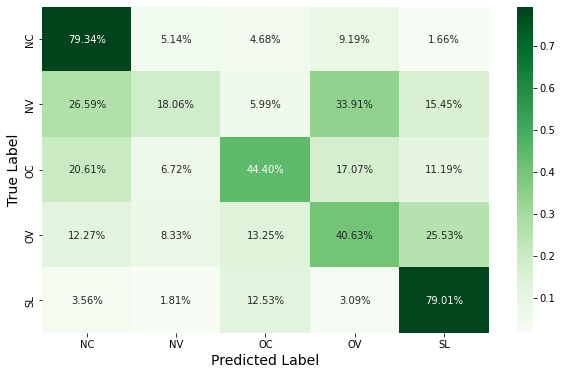

In [403]:
show_results_class(df_in=df_redux, model=sgd_model, y_val=sgd_y_val, y_pred=sgd_model_pred, c_names=class_names)

---
---
# Balanced Dataframe

Se va a balancear las muestras para ver si mejoran los resultados de clasificación

In [28]:
df['class'].value_counts()

OV    211771
OC    168701
SL     50862
NC     42996
NV     24140
Name: class, dtype: int64

In [29]:
columns_to_copy = mfcc_names + delta_names + ['speaker'] + ['class']

print(columns_to_copy)

['mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'delta0', 'delta1', 'delta2', 'delta3', 'delta4', 'delta5', 'delta6', 'delta7', 'delta8', 'delta9', 'delta10', 'delta11', 'delta12', 'speaker', 'class']


In [30]:
df_balanced = df[columns_to_copy].copy()

df_balanced.columns = [*df_balanced.columns[:-1], 'class'] # last columns always has name class
df_balanced.dropna(axis=0, inplace=True)
df_balanced.head()

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,delta5,delta6,delta7,delta8,delta9,delta10,delta11,delta12,speaker,class
0,-0.154322,4.283002,-0.183202,0.562824,0.435947,0.498896,0.164709,0.122740,0.342607,-0.019678,...,0.066519,0.021961,0.016365,0.045681,-0.002624,0.042330,-0.043119,-0.031021,AguilarJimenez,SL
1,-0.449335,3.925621,-0.471724,0.380736,0.174109,0.582583,0.435990,0.265222,-0.138582,0.216384,...,0.127567,0.074603,0.047637,0.015783,0.026883,0.083727,-0.065731,-0.048133,AguilarJimenez,SL
2,-0.837710,4.287087,-0.380308,0.036878,0.194451,0.373683,0.541881,0.430390,0.179712,-0.124792,...,0.141342,0.126830,0.092090,0.032944,0.003688,0.106623,-0.097588,-0.045491,AguilarJimenez,SL
3,-1.408038,3.971979,0.403533,0.040975,-0.275404,0.375629,0.569952,0.465709,0.013315,-0.060689,...,0.142921,0.164738,0.126906,0.021928,-0.006801,0.113960,-0.053359,-0.062108,AguilarJimenez,SL
4,-2.035720,3.313075,0.276838,0.297700,-0.105270,0.607505,0.597857,0.434183,0.291487,0.289598,...,0.162895,0.187368,0.141995,0.047558,0.031437,0.081155,-0.044359,-0.041707,AguilarJimenez,SL


In [31]:
df_balanced = df_balanced.groupby(by='class').sample(n=min(df_balanced['class'].value_counts()), replace=False, random_state=42)

In [32]:
df_balanced['class'].value_counts()

NC    24140
OV    24140
SL    24140
OC    24140
NV    24140
Name: class, dtype: int64

In [33]:
df_balanced.head()

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,delta5,delta6,delta7,delta8,delta9,delta10,delta11,delta12,speaker,class
411816,-6.887177,3.669544,-1.589886,1.232372,0.698735,0.222697,0.772120,1.068301,-0.152085,-0.468792,...,-0.114453,0.155185,0.091269,-0.140473,-0.080446,0.261244,0.028553,-0.134805,RoccoGil,NC
185241,0.584400,4.796411,-0.025372,1.776653,0.526914,0.549276,-0.225844,0.031960,-0.516828,0.531089,...,0.070058,-0.072545,0.019037,-0.031651,0.079073,-0.007265,-0.019600,0.000938,Desconocida010,NC
95402,1.913468,3.445422,-0.066059,1.558963,0.732780,0.042558,1.200518,0.293264,-0.135198,0.032897,...,0.113820,0.263572,-0.066207,0.068811,0.021506,-0.145837,0.279380,0.030602,CriadoFernandez,NC
495136,0.027930,5.047319,1.903735,1.496399,-0.054628,0.152011,0.339149,0.154060,-0.133055,0.376456,...,0.038996,0.057145,0.023529,-0.055233,0.073496,0.096639,-0.047739,0.131638,desconocida001,NC
240421,0.513619,4.081587,0.364482,1.459645,0.353395,-0.492208,0.884576,-0.004133,-0.431220,-0.136400,...,-0.278625,0.004723,-0.005210,0.198644,-0.104207,0.022003,-0.019068,-0.043117,GioveMeschian,NC


### Balanceado Random Forest

In [414]:
from sklearn.ensemble import RandomForestClassifier

In [415]:
def create_rf_model():
    '''
    Create RandomForestClassifier for k-fold classification
    '''
    return RandomForestClassifier( # %%time n_estimators=1 --> 3 s 
            n_estimators=100,
            criterion='gini',
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1,
            min_weight_fraction_leaf=0.0,
            max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_impurity_split=None,
            bootstrap=True,
            oob_score=False,
            n_jobs=None,
            random_state=None,
            verbose=0,
            warm_start=False,
            class_weight=None,# dict_class_weight, #None,
            ccp_alpha=0.0,
            max_samples=None
            ) 

In [416]:
k_fold = 1
speaker_names = df_redux['speaker'].unique()

In [417]:
%%time
rf_model, rf_y_val, rf_model_pred = calculate_k_fold(df_balanced, k_fold, speaker_names, function_model=create_rf_model)

Calculando k-fold:

Fold 1
Fin de k-fold
Wall time: 45.8 s


 --------------- Validation data ------------------
[[3455  643  402  178   38]
 [ 581 2731  278  740  698]
 [ 516  328 3113  568  367]
 [ 284 1046  727 1653 1189]
 [  68   51  550  117 3856]]
	
              precision    recall  f1-score   support

          NC       0.70      0.73      0.72      4716
          NV       0.57      0.54      0.56      5028
          OC       0.61      0.64      0.62      4892
          OV       0.51      0.34      0.41      4899
          SL       0.63      0.83      0.71      4642

    accuracy                           0.61     24177
   macro avg       0.60      0.62      0.60     24177
weighted avg       0.60      0.61      0.60     24177

	
 --------------- Matriz de confusión ------------------
	
Accuracy por clases:

NC: 73.26 %
NV: 54.32 %
OC: 63.63 %
OV: 33.74 %
SL: 83.07 %
	
 --------------- Importancia descriptores ------------------
    feature  importance
1     mfcc1    0.095111
0     mfcc0    0.070429
3     mfcc3    0.058806
4     mfcc4    

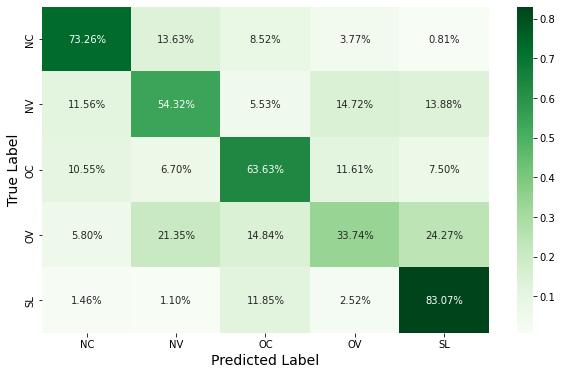

<Figure size 864x576 with 0 Axes>

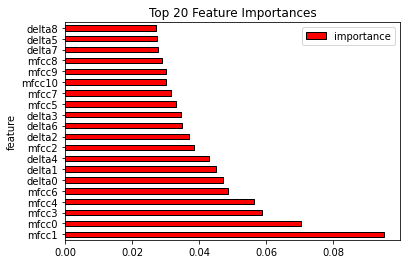

In [418]:
show_results_class(df_in=df_redux, model=rf_model, y_val=rf_y_val, y_pred=rf_model_pred, c_names=class_names)

### Balanceado Stochastic Gradient Descent

In [410]:
k_fold = 1
speaker_names = df_balanced['speaker'].unique()
len(speaker_names)

134

In [411]:
def create_sgd_model():
    '''
    Create Stochastic Gradient Descent for k-fold classification
    '''
    return SGDClassifier(
            loss='hinge',
            penalty='l2',
            alpha=0.0001,
            l1_ratio=0.15,
            fit_intercept=True,
            max_iter=100,#1000,
            tol=0.001,
            shuffle=True,
            verbose=0,
            epsilon=0.1,
            n_jobs=None,
            random_state=None,
            learning_rate='optimal',
            eta0=0.0,
            power_t=0.5,
            early_stopping=False,
            validation_fraction=0.1,
            n_iter_no_change=5,
            class_weight=None,#dict_class_weight, #None,
            warm_start=False,
            average=False
        )

In [412]:
%%time
sgd_model, sgd_y_val, sgd_model_pred = calculate_k_fold(df_balanced, k_fold, speaker_names, function_model=create_sgd_model)

Calculando k-fold:

Fold 1
Fin de k-fold
Wall time: 1.08 s


 --------------- Validation data ------------------
[[2728  521   33  787   78]
 [ 398 2001   37  956  813]
 [ 598  346 1025 1241 1088]
 [ 204 1121  145 1356 1288]
 [ 105   62   90  203 4294]]
	
              precision    recall  f1-score   support

          NC       0.68      0.66      0.67      4147
          NV       0.49      0.48      0.48      4205
          OC       0.77      0.24      0.36      4298
          OV       0.30      0.33      0.31      4114
          SL       0.57      0.90      0.70      4754

    accuracy                           0.53     21518
   macro avg       0.56      0.52      0.51     21518
weighted avg       0.56      0.53      0.51     21518

	
 --------------- Matriz de confusión ------------------
	
Accuracy por clases:

NC: 65.78 %
NV: 47.59 %
OC: 23.85 %
OV: 32.96 %
SL: 90.32 %
	
 --------------- Importancia descriptores ------------------
El modelo no implementa feature_importance


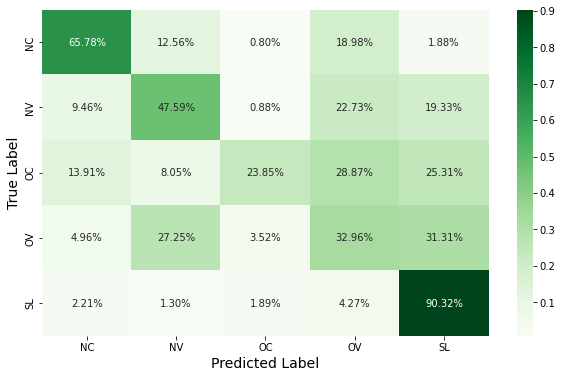

In [413]:
show_results_class(df_in=df_redux, model=sgd_model, y_val=sgd_y_val, y_pred=sgd_model_pred, c_names=class_names)

---
---
# Classification with 3 classes: nasal, oral and silence

In [19]:
df.head()

,Row,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,...,silence_nasal_oral,vowel0_consonant1,ov0_oc1,nv0_nc1,oral0_nasal1,ov0_nv1,oc0_nc1,window,text,speaker
0,revisados_AguilarJimenez_Vanero_w000001_SL,-0.154322,4.283002,-0.183202,0.562824,0.435947,0.498896,0.164709,0.122740,0.342607,...,silence,NaN,NaN,NaN,NaN,NaN,NaN,w000001,Joyero,AguilarJimenez
1,revisados_AguilarJimenez_Vanero_w000002_SL,-0.449335,3.925621,-0.471724,0.380736,0.174109,0.582583,0.435990,0.265222,-0.138582,...,silence,NaN,NaN,NaN,NaN,NaN,NaN,w000002,Joyero,AguilarJimenez
2,revisados_AguilarJimenez_Vanero_w000003_SL,-0.837710,4.287087,-0.380308,0.036878,0.194451,0.373683,0.541881,0.430390,0.179712,...,silence,NaN,NaN,NaN,NaN,NaN,NaN,w000003,Joyero,AguilarJimenez
3,revisados_AguilarJimenez_Vanero_w000004_SL,-1.408038,3.971979,0.403533,0.040975,-0.275404,0.375629,0.569952,0.465709,0.013315,...,silence,NaN,NaN,NaN,NaN,NaN,NaN,w000004,Joyero,AguilarJimenez
4,revisados_AguilarJimenez_Vanero_w000005_SL,-2.035720,3.313075,0.276838,0.297700,-0.105270,0.607505,0.597857,0.434183,0.291487,...,silence,NaN,NaN,NaN,NaN,NaN,NaN,w000005,Joyero,AguilarJimenez


<AxesSubplot:xlabel='silence_nasal_oral', ylabel='Count'>

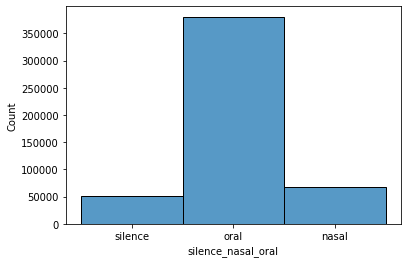

In [20]:
sns.histplot(data=df, x='silence_nasal_oral')

In [21]:
df['silence_nasal_oral'].value_counts()

oral       380472
nasal       67136
silence     50862
Name: silence_nasal_oral, dtype: int64

In [22]:
df['silence_nasal_oral'].value_counts()/len(df['silence_nasal_oral'])*100

oral       76.327964
nasal      13.468413
silence    10.203623
Name: silence_nasal_oral, dtype: float64

<AxesSubplot:xlabel='silence_nasal_oral', ylabel='mfcc0'>

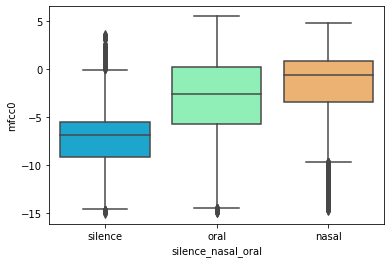

In [23]:
sns.boxplot(x="silence_nasal_oral", y="mfcc0", data=df, palette='rainbow')

<AxesSubplot:xlabel='mfcc0', ylabel='Density'>

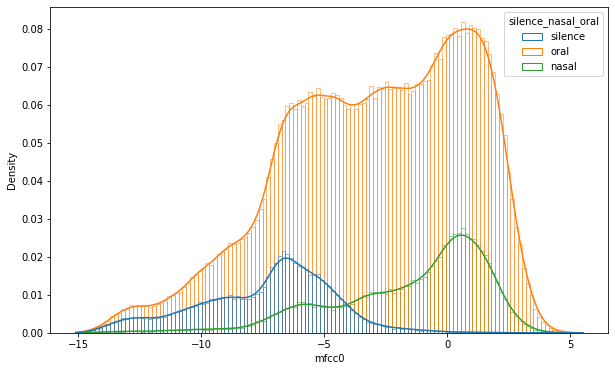

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='mfcc0', hue='silence_nasal_oral', kde=True, stat='density', fill=False)

In [25]:
print(df.columns) # mfcc_names delta_names deltaDelta_names

Index(['Row', 'mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
       'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'delta0',
       'delta1', 'delta2', 'delta3', 'delta4', 'delta5', 'delta6', 'delta7',
       'delta8', 'delta9', 'delta10', 'delta11', 'delta12', 'deltaDelta0',
       'deltaDelta1', 'deltaDelta2', 'deltaDelta3', 'deltaDelta4',
       'deltaDelta5', 'deltaDelta6', 'deltaDelta7', 'deltaDelta8',
       'deltaDelta9', 'deltaDelta10', 'deltaDelta11', 'deltaDelta12', 'class',
       'class_four', 'silence0_sound1', 'silence_nasal_oral',
       'vowel0_consonant1', 'ov0_oc1', 'nv0_nc1', 'oral0_nasal1', 'ov0_nv1',
       'oc0_nc1', 'window', 'text', 'speaker'],
      dtype='object')


In [28]:
columns_to_copy = mfcc_names + delta_names + ['speaker'] + ['silence_nasal_oral']

print(columns_to_copy)

['mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'delta0', 'delta1', 'delta2', 'delta3', 'delta4', 'delta5', 'delta6', 'delta7', 'delta8', 'delta9', 'delta10', 'delta11', 'delta12', 'speaker', 'silence_nasal_oral']


In [29]:
df_redux = df[columns_to_copy].copy()

df_redux.columns = [*df_redux.columns[:-1], 'class'] # last columns always has name class
df_redux.dropna(axis=0, inplace=True)
df_redux.head()

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,delta5,delta6,delta7,delta8,delta9,delta10,delta11,delta12,speaker,class
0,-0.154322,4.283002,-0.183202,0.562824,0.435947,0.498896,0.164709,0.122740,0.342607,-0.019678,...,0.066519,0.021961,0.016365,0.045681,-0.002624,0.042330,-0.043119,-0.031021,AguilarJimenez,silence
1,-0.449335,3.925621,-0.471724,0.380736,0.174109,0.582583,0.435990,0.265222,-0.138582,0.216384,...,0.127567,0.074603,0.047637,0.015783,0.026883,0.083727,-0.065731,-0.048133,AguilarJimenez,silence
2,-0.837710,4.287087,-0.380308,0.036878,0.194451,0.373683,0.541881,0.430390,0.179712,-0.124792,...,0.141342,0.126830,0.092090,0.032944,0.003688,0.106623,-0.097588,-0.045491,AguilarJimenez,silence
3,-1.408038,3.971979,0.403533,0.040975,-0.275404,0.375629,0.569952,0.465709,0.013315,-0.060689,...,0.142921,0.164738,0.126906,0.021928,-0.006801,0.113960,-0.053359,-0.062108,AguilarJimenez,silence
4,-2.035720,3.313075,0.276838,0.297700,-0.105270,0.607505,0.597857,0.434183,0.291487,0.289598,...,0.162895,0.187368,0.141995,0.047558,0.031437,0.081155,-0.044359,-0.041707,AguilarJimenez,silence


In [30]:
print(f'Número de filas en data frame: {len(df_redux.index)} \nNúmero de filas eliminadas: {len(df.index)-len(df_redux.index)}')

Número de filas en data frame: 498470 
Número de filas eliminadas: 0


In [31]:
df_redux['class'].value_counts().sort_index(ascending=False)

silence     50862
oral       380472
nasal       67136
Name: class, dtype: int64

In [32]:
class_data = df_redux['class']
class_names = df_redux['class'].unique().tolist()
class_names.sort()

dict_class_weight = dict(zip(class_names,compute_class_weight(class_weight='balanced', classes=class_names, y=class_data)))
dict_class_weight

{'nasal': 2.4749265173180808,
 'oral': 0.43671194376108274,
 'silence': 3.2668134691256077}

### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
def create_rf_model():
    '''
    Create RandomForestClassifier for k-fold classification
    '''
    return RandomForestClassifier( # %%time n_estimators=1 --> 3 s 
            n_estimators=10,
            criterion='gini',
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1,
            min_weight_fraction_leaf=0.0,
            max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_impurity_split=None,
            bootstrap=True,
            oob_score=False,
            n_jobs=None,
            random_state=None,
            verbose=0,
            warm_start=False,
            class_weight= dict_class_weight, #None,
            ccp_alpha=0.0,
            max_samples=None
            ) 

In [35]:
k_fold = 1
speaker_names = df_redux['speaker'].unique()

In [36]:
%%time
rf_model, rf_y_val, rf_model_pred = calculate_k_fold(df_redux, k_fold, speaker_names, function_model=create_rf_model)

Calculando k-fold:

Fold 1
Fin de k-fold
Wall time: 23.7 s


In [396]:
# rf_model, rf_y_val, rf_model_pred

 --------------- Validation data ------------------
[[ 4841  8462   151]
 [ 2151 71924  2014]
 [   58  7715  2062]]
	
              precision    recall  f1-score   support

       nasal       0.69      0.36      0.47     13454
        oral       0.82      0.95      0.88     76089
     silence       0.49      0.21      0.29      9835

    accuracy                           0.79     99378
   macro avg       0.66      0.50      0.55     99378
weighted avg       0.77      0.79      0.76     99378

	
 --------------- Matriz de confusión ------------------
	
Accuracy por clases:

nasal: 35.98 %
oral: 94.53 %
silence: 20.97 %
	
 --------------- Importancia descriptores ------------------
    feature  importance
0     mfcc0    0.121285
1     mfcc1    0.113290
3     mfcc3    0.088800
13   delta0    0.056315
6     mfcc6    0.050785
14   delta1    0.044938
4     mfcc4    0.032515
17   delta4    0.032367
16   delta3    0.031923
7     mfcc7    0.031451
15   delta2    0.031048
5     mfcc5    0.03095

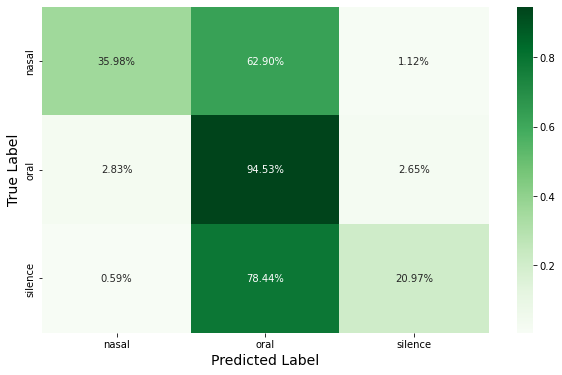

<Figure size 864x576 with 0 Axes>

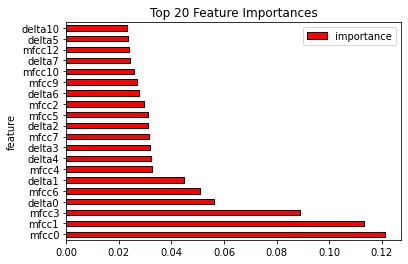

In [37]:
show_results_class(df_in=df_redux, model=rf_model, y_val=rf_y_val, y_pred=rf_model_pred, c_names=class_names)

### Stochastic Gradient Descent

In [38]:
from sklearn.linear_model import SGDClassifier

In [42]:
def create_sgd_model():
    '''
    Create Stochastic Gradient Descent for k-fold classification
    '''
    return SGDClassifier(
            loss='hinge',
            penalty='l2',
            alpha=0.0001,
            l1_ratio=0.15,
            fit_intercept=True,
            max_iter=1000,#1000,
            tol=0.001,
            shuffle=True,
            verbose=0,
            epsilon=0.1,
            n_jobs=None,
            random_state=None,
            learning_rate='optimal',
            eta0=0.0,
            power_t=0.5,
            early_stopping=False,
            validation_fraction=0.1,
            n_iter_no_change=5,
            class_weight=dict_class_weight,#dict_class_weight, #None,
            warm_start=False,
            average=False
        )

In [43]:
k_fold = 1
speaker_names = df_redux['speaker'].unique()

In [44]:
%%time
sgd_model, sgd_y_val, sgd_model_pred = calculate_k_fold(df_redux, k_fold, speaker_names, function_model=create_sgd_model)

Calculando k-fold:

Fold 1
Fin de k-fold
Wall time: 2.56 s


In [45]:
# sgd_model, sgd_y_val, sgd_model_pred

 --------------- Validation data ------------------
[[ 5256  7628   570]
 [ 5491 62611  7987]
 [  260  4604  4971]]
	
              precision    recall  f1-score   support

       nasal       0.48      0.39      0.43     13454
        oral       0.84      0.82      0.83     76089
     silence       0.37      0.51      0.43      9835

    accuracy                           0.73     99378
   macro avg       0.56      0.57      0.56     99378
weighted avg       0.74      0.73      0.74     99378

	
 --------------- Matriz de confusión ------------------
	
Accuracy por clases:

nasal: 39.07 %
oral: 82.29 %
silence: 50.54 %
	
 --------------- Importancia descriptores ------------------
El modelo no implementa feature_importance


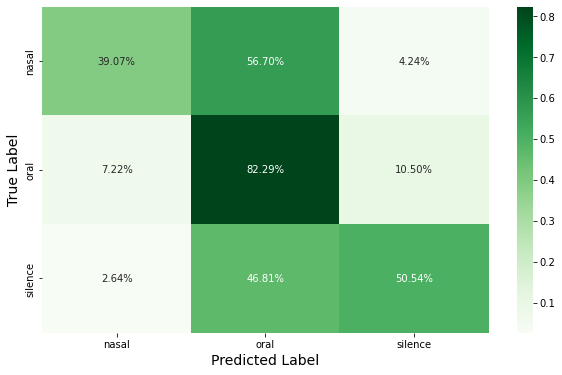

In [46]:
show_results_class(df_in=df_redux, model=sgd_model, y_val=sgd_y_val, y_pred=sgd_model_pred, c_names=class_names)

---
---
# Balanced Dataframe

Se va a balancear las muestras para ver si mejoran los resultados de clasificación

In [72]:
df['silence_nasal_oral'].value_counts()

oral       380472
nasal       67136
silence     50862
Name: silence_nasal_oral, dtype: int64

In [73]:
columns_to_copy = mfcc_names + delta_names + ['speaker'] + ['silence_nasal_oral']

print(columns_to_copy)

['mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'delta0', 'delta1', 'delta2', 'delta3', 'delta4', 'delta5', 'delta6', 'delta7', 'delta8', 'delta9', 'delta10', 'delta11', 'delta12', 'speaker', 'silence_nasal_oral']


In [107]:
df_balanced = df[columns_to_copy].copy()

df_balanced.columns = [*df_balanced.columns[:-1], 'class'] # last columns always has name class
df_balanced.dropna(axis=0, inplace=True)
df_balanced.head()

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,delta5,delta6,delta7,delta8,delta9,delta10,delta11,delta12,speaker,class
0,-0.154322,4.283002,-0.183202,0.562824,0.435947,0.498896,0.164709,0.122740,0.342607,-0.019678,...,0.066519,0.021961,0.016365,0.045681,-0.002624,0.042330,-0.043119,-0.031021,AguilarJimenez,silence
1,-0.449335,3.925621,-0.471724,0.380736,0.174109,0.582583,0.435990,0.265222,-0.138582,0.216384,...,0.127567,0.074603,0.047637,0.015783,0.026883,0.083727,-0.065731,-0.048133,AguilarJimenez,silence
2,-0.837710,4.287087,-0.380308,0.036878,0.194451,0.373683,0.541881,0.430390,0.179712,-0.124792,...,0.141342,0.126830,0.092090,0.032944,0.003688,0.106623,-0.097588,-0.045491,AguilarJimenez,silence
3,-1.408038,3.971979,0.403533,0.040975,-0.275404,0.375629,0.569952,0.465709,0.013315,-0.060689,...,0.142921,0.164738,0.126906,0.021928,-0.006801,0.113960,-0.053359,-0.062108,AguilarJimenez,silence
4,-2.035720,3.313075,0.276838,0.297700,-0.105270,0.607505,0.597857,0.434183,0.291487,0.289598,...,0.162895,0.187368,0.141995,0.047558,0.031437,0.081155,-0.044359,-0.041707,AguilarJimenez,silence


In [108]:
min_n = min(df_balanced['class'].value_counts())
max_n = 2*min_n
print(max_n)
print(min_n)

101724
50862


In [109]:
df_balanced = df_balanced.groupby(by='class').apply(lambda x: x.sample(n=min(x.count()[0],max_n), replace=False, random_state=42))

In [110]:
df_balanced['class'].value_counts()

oral       101724
nasal       67136
silence     50862
Name: class, dtype: int64

In [111]:
df_balanced.head()

mfcc0     mfcc1     mfcc2     mfcc3     mfcc4     mfcc5  \
class                                                                      
nasal 408342 -1.510498  3.130336 -0.456822  1.079940  0.889249  0.097899   
      167259  0.155039  4.248048 -0.433106  0.475729  0.438760  0.358409   
      290179 -1.482806  3.641285 -1.615791  0.836174 -0.252118  0.079272   
      132921 -4.956645  4.703036 -0.048192  0.684027  0.480677  0.570195   
      376331 -2.924243  4.075574 -0.444455  1.132261  0.118997  0.266889   

                 mfcc6     mfcc7     mfcc8     mfcc9  ...    delta5    delta6  \
class                                                 ...                       
nasal 408342  0.661606 -0.362705 -0.530696 -0.003762  ...  0.041545  0.149000   
      167259  0.564993  0.310250  0.429893  0.514301  ...  0.135747  0.203201   
      290179 -0.270621 -0.875165  0.262524  0.052896  ...  0.082923  0.115828   
      132921  0.762464 -0.082531 -0.251262  0.130019  ...  0.145545  0.228711   
      376331  0.482029  0.131962 -0.126848  0.063669  ... -0.178261  0.086235   

                delta7    delta8    delta9   delta10   delta11   delta12  \
class                                                                      
nasal 408342 -0.141615 -0.206851  0.190488  0.212336  0.012071 -0.066357   
      167259  0.109499 -0.081387  0.040557  0.052738  0.024229 -0.014752   
      290179  0.007918 -0.011150 -0.029841  0.033122 -0.001278  0.047881   
      132921  0.125344  0.091583  0.004630 -0.004562  0.118888  0.008080   
      376331 -0.130526  0.026374  0.097492  0.102698 -0.056690 -0.112191   

                      speaker  class  
class                                 
nasal 408342          Robledo  nasal  
      167259   Desconocida009  nasal  
      290179  JimenezMercedes  nasal  
      132921   Desconocida003  nasal  
      376331   PascualArevalo  nasal  

[5 rows x 28 columns]

### Balanceado Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
def create_rf_model():
    '''
    Create RandomForestClassifier for k-fold classification
    '''
    return RandomForestClassifier( # %%time n_estimators=1 --> 3 s 
            n_estimators=100,
            criterion='gini',
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1,
            min_weight_fraction_leaf=0.0,
            max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_impurity_split=None,
            bootstrap=True,
            oob_score=False,
            n_jobs=None,
            random_state=None,
            verbose=0,
            warm_start=False,
            class_weight=None,# dict_class_weight, #None,
            ccp_alpha=0.0,
            max_samples=None
            ) 

In [114]:
k_fold = 1
speaker_names = df_redux['speaker'].unique()

In [115]:
%%time
rf_model, rf_y_val, rf_model_pred = calculate_k_fold(df_balanced, k_fold, speaker_names, function_model=create_rf_model)

Calculando k-fold:

Fold 1
Fin de k-fold
Wall time: 1min 33s


 --------------- Validation data ------------------
[[ 8963  3821   670]
 [ 1922 15593  2843]
 [  143  2355  7337]]
	
              precision    recall  f1-score   support

       nasal       0.81      0.67      0.73     13454
        oral       0.72      0.77      0.74     20358
     silence       0.68      0.75      0.71      9835

    accuracy                           0.73     43647
   macro avg       0.74      0.73      0.73     43647
weighted avg       0.74      0.73      0.73     43647

	
 --------------- Matriz de confusión ------------------
	
Accuracy por clases:

nasal: 66.62 %
oral: 76.59 %
silence: 74.60 %
	
 --------------- Importancia descriptores ------------------
    feature  importance
1     mfcc1    0.107445
0     mfcc0    0.097567
3     mfcc3    0.063811
6     mfcc6    0.056856
14   delta1    0.051121
13   delta0    0.046415
16   delta3    0.035234
7     mfcc7    0.035062
15   delta2    0.033846
4     mfcc4    0.032968
2     mfcc2    0.032950
19   delta6    0.03255

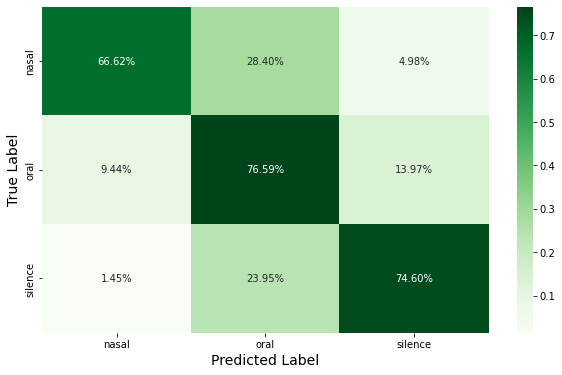

<Figure size 864x576 with 0 Axes>

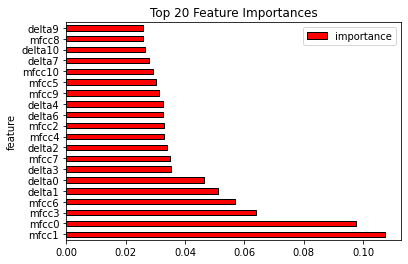

In [116]:
show_results_class(df_in=df_redux, model=rf_model, y_val=rf_y_val, y_pred=rf_model_pred, c_names=class_names)

### Balanceado Stochastic Gradient Descent

In [117]:
k_fold = 1
speaker_names = df_balanced['speaker'].unique()
len(speaker_names)

134

In [118]:
def create_sgd_model():
    '''
    Create Stochastic Gradient Descent for k-fold classification
    '''
    return SGDClassifier(
            loss='hinge',
            penalty='l2',
            alpha=0.0001,
            l1_ratio=0.15,
            fit_intercept=True,
            max_iter=1000,#1000,
            tol=0.001,
            shuffle=True,
            verbose=0,
            epsilon=0.1,
            n_jobs=None,
            random_state=None,
            learning_rate='optimal',
            eta0=0.0,
            power_t=0.5,
            early_stopping=False,
            validation_fraction=0.1,
            n_iter_no_change=5,
            class_weight=None,#dict_class_weight, #None,
            warm_start=False,
            average=False
        )

In [119]:
%%time
sgd_model, sgd_y_val, sgd_model_pred = calculate_k_fold(df_balanced, k_fold, speaker_names, function_model=create_sgd_model)

Calculando k-fold:

Fold 1
Fin de k-fold
Wall time: 1.23 s


 --------------- Validation data ------------------
[[ 7964  2926   756]
 [ 3965 10985  3258]
 [  326  1557  6109]]
	
              precision    recall  f1-score   support

       nasal       0.65      0.68      0.67     11646
        oral       0.71      0.60      0.65     18208
     silence       0.60      0.76      0.67      7992

    accuracy                           0.66     37846
   macro avg       0.65      0.68      0.66     37846
weighted avg       0.67      0.66      0.66     37846

	
 --------------- Matriz de confusión ------------------
	
Accuracy por clases:

nasal: 68.38 %
oral: 60.33 %
silence: 76.44 %
	
 --------------- Importancia descriptores ------------------
El modelo no implementa feature_importance


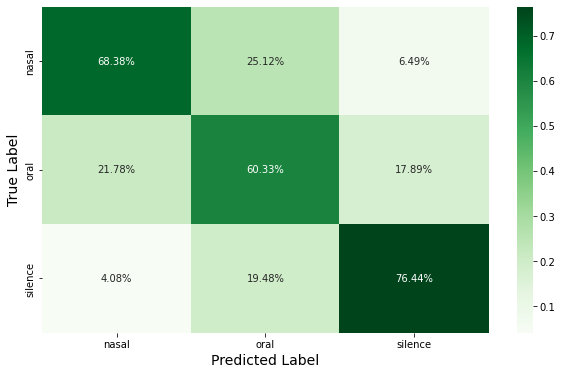

In [120]:
show_results_class(df_in=df_redux, model=sgd_model, y_val=sgd_y_val, y_pred=sgd_model_pred, c_names=class_names)

---
---
# Classification with Deep Neural Network

In [3]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

from sklearn.preprocessing import LabelBinarizer

Se definen los parámetros básicos de la red

In [4]:
num_batch_size = 128
num_epochs = 100 #25

df_in = df_balanced; # df_redux df_balanced

class_names = df_in['class'].unique().tolist()
class_names.sort()

num_class = len(class_names)

print(f'Numero clases salida: {num_class}\n')
print(f'Tamaño del batch: {num_batch_size}')
print(f'Numero epochs: {num_epochs}')

NameError: name 'df_balanced' is not defined

In [171]:
class_weight_vect = compute_class_weight(class_weight='balanced', classes = class_names, y=df_in['class'])
dict_class_weight = dict(zip(class_names,class_weight_vect))
dict_class_weight

{'nasal': 1.0909298538290435,
 'oral': 0.7199939706132935,
 'silence': 1.439987941226587}

### Modelo

In [172]:
def make_model(num_class_out, metrics=''):
    # Función para la creación y compilación del modelo
    
    model = Sequential()

    model.add(Dense(units = 1024, activation='relu'))  # 1024
    model.add(keras.layers.Dropout(.5))
    model.add(Dense(units = 1024, activation = 'relu'))
    model.add(keras.layers.Dropout(.5))
    #model.add(Dense(units = 1024, activation = 'relu'))
    #model.add(keras.layers.Dropout(.2))
    model.add(Dense(units = 1024, activation = 'relu'))
    model.add(Dense(units = num_class_out, activation = 'softmax'))
    
    if not metrics:
        model.compile(
          optimizer=keras.optimizers.Adam(learning_rate=1e-3), #learning_rate=1e-3
          loss='categorical_crossentropy')
    else:
        model.compile(
          optimizer=keras.optimizers.Adam(learning_rate=1e-3), #learning_rate=1e-3
          loss='categorical_crossentropy',
          metrics=metrics)
    # end if 

    return model
# end def mak_model

### K-Fold

In [173]:
def calculate_k_fold_ann(df_in, k_fold, speaker_names, class_names, function_model):
    if k_fold == 1:
        kf = KFold(n_splits=5, shuffle=True, random_state = 42)
    else:
        kf = KFold(n_splits=k_fold, shuffle=True, random_state = 42)


    # Codificación clases con one-hot 
    encoder = LabelBinarizer()
    encoder.fit(class_names)

    # Variables para guardar los resultados
    history_kfold = []


    print("Calculando k-fold:\n")
    for n_fold, (train_index, val_index) in enumerate(kf.split(speaker_names)): # train_index, val_index in kf.split(patient_names):

        # Se separan por apellidos
        df_train = df_in[pd.DataFrame(df_in['speaker'].tolist()).isin(speaker_names[train_index]).any(1).values]
        df_val = df_in[pd.DataFrame(df_in['speaker'].tolist()).isin(speaker_names[val_index]).any(1).values]

        # Se generan los datos
        X_train = df_train.drop(['class','speaker'],axis=1)
        X_val = df_val.drop(['class','speaker'],axis=1)

        y_train = df_train['class'].to_numpy()
        y_val = df_val['class'].to_numpy()

        # Normalización
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

        # Codificación clases con one-hot 
        y_train = encoder.transform(y_train)
        y_val = encoder.transform(y_val)

        
        # Peso de las clases
        y_integers = np.argmax(y_train, axis=1)
        class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
        d_class_weights = dict(enumerate(class_weights))
        #print(d_class_weights)

        # Instancia del modelo
        model = function_model(num_class_out=len(class_names), metrics='')

        # Entrenamiento y evaluación
        model.fit(X_train, y_train,
                    batch_size=num_batch_size,
                    epochs=num_epochs, 
                    verbose=1, 
                    validation_data=(X_val,y_val),
                    shuffle=True
                    #,class_weight=d_class_weights
                    )
        history_kfold.append(model.history)
  
        y_pred = model.predict(X_val)

        # Transform y_val and y_pred in string class
        #y_val=y_val.argmax(axis=1).tolist()
        #y_pred=y_pred.argmax(axis=1).tolist()
    
    
        print(f'Fold {n_fold + 1}') 

        if k_fold==1: # Permite ejecutar una única 
            break
        #end if 
    #end for 
    return history_kfold, y_val, y_pred, encoder
#end def       

In [174]:
k_fold = 1
speaker_names = df_in['speaker'].unique()

In [175]:
%%time
history_kfold, y_val_dnn, y_pred_dnn, encoder_dnn = calculate_k_fold_ann(
    df_in=df_in, k_fold=k_fold, speaker_names=speaker_names, class_names=class_names, function_model=make_model)

Calculando k-fold:



C:\Users\Usuario\anaconda3\envs\hello-tf\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0 1 2], y=[0 0 0 ... 2 2 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Epoch 1/100
1421/1421 [==============================] - 5s 4ms/step - loss: 0.8126 - val_loss: 0.7014
Epoch 2/100
1421/1421 [==============================] - 5s 4ms/step - loss: 0.7443 - val_loss: 0.6857
Epoch 3/100
1421/1421 [==============================] - 5s 3ms/step - loss: 0.7213 - val_loss: 0.6540
Epoch 4/100
1421/1421 [==============================] - 5s 4ms/step - loss: 0.7171 - val_loss: 0.6634
Epoch 5/100
1421/1421 [==============================] - 5s 4ms/step - loss: 0.7073 - val_loss: 0.6552
Epoch 6/100
1421/1421 [==============================] - 5s 4ms/step - loss: 0.7043 - val_loss: 0.6641
Epoch 7/100
1421/1421 [==============================] - 5s 4ms/step - loss: 0.7023 - val_loss: 0.6464
Epoch 8/100
1421/1421 [==============================] - 5s 4ms/step - loss: 0.6982 - val_loss: 0.6440
Epoch 9/100
1421/1421 [==============================] - 5s 4ms/step - loss: 0.6960 - val_loss: 0.6435
Epoch 10/100
1421/1421 [==============================] - 5s 4ms/step - l

<AxesSubplot:>

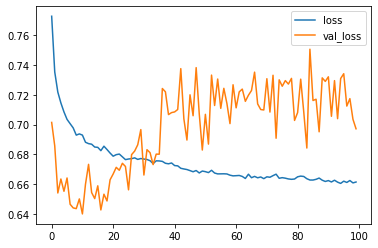

In [176]:
model_loss = pd.DataFrame(history_kfold[0].history)
model_loss.plot()
# history_kfold[0]

In [177]:
y_val_dnn_str = encoder_dnn.inverse_transform(y_val_dnn)
y_pred_dnn_str = encoder_dnn.inverse_transform(y_pred_dnn)

 --------------- Validation data ------------------
[[ 3900  7061   685]
 [  513 14575  3120]
 [    6  1279  6707]]
	
              precision    recall  f1-score   support

       nasal       0.88      0.33      0.49     11646
        oral       0.64      0.80      0.71     18208
     silence       0.64      0.84      0.72      7992

    accuracy                           0.67     37846
   macro avg       0.72      0.66      0.64     37846
weighted avg       0.71      0.67      0.64     37846

	
 --------------- Matriz de confusión ------------------
	
Accuracy por clases:

nasal: 33.49 %
oral: 80.05 %
silence: 83.92 %
	
 --------------- Importancia descriptores ------------------
El modelo no implementa feature_importance


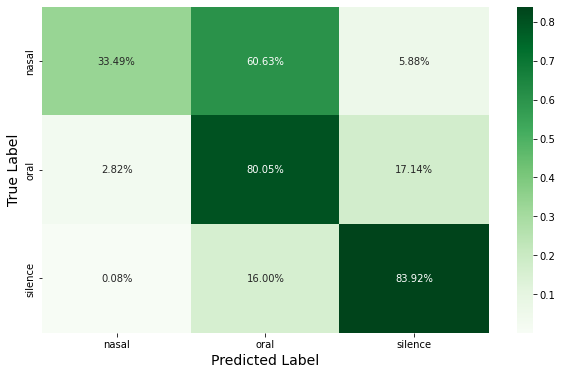

In [178]:
show_results_class(df_in=[], model=[], y_val=y_val_dnn_str, y_pred=y_pred_dnn_str, c_names=class_names)

 --------------- Validation data ------------------
[[ 8827  2187   632]
 [ 2305 12961  2942]
 [   91  1099  6802]]
	
              precision    recall  f1-score   support

       nasal       0.79      0.76      0.77     11646
        oral       0.80      0.71      0.75     18208
     silence       0.66      0.85      0.74      7992

    accuracy                           0.76     37846
   macro avg       0.75      0.77      0.75     37846
weighted avg       0.76      0.76      0.76     37846

	
 --------------- Matriz de confusión ------------------
	
Accuracy por clases:

nasal: 75.79 %
oral: 71.18 %
silence: 85.11 %
	
 --------------- Importancia descriptores ------------------
El modelo no implementa feature_importance


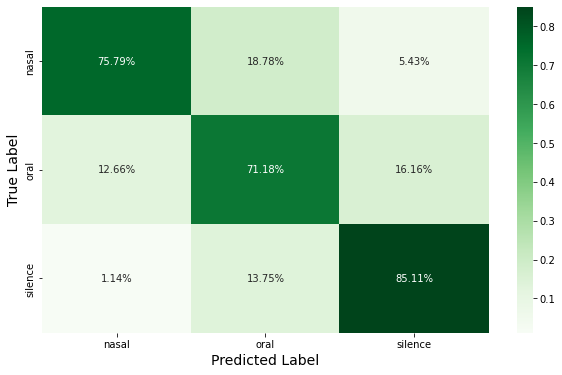

In [157]:
show_results_class(df_in=[], model=[], y_val=y_val_dnn_str, y_pred=y_pred_dnn_str, c_names=class_names)

Este es el resultado con 200 epochs, dataset balanceado y una red de 512, drop 0.5, 512

<AxesSubplot:>

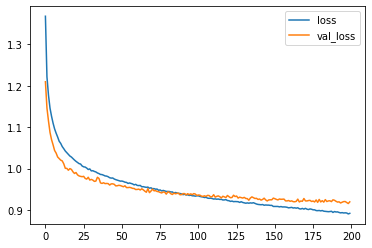

In [459]:
model_loss = pd.DataFrame(history_kfold[0].history)
model_loss.plot()
# history_kfold[0]

Con data set completo 

<AxesSubplot:>

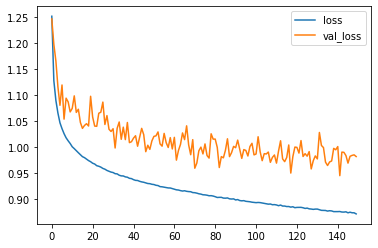

In [83]:
model_loss = pd.DataFrame(history_kfold[0].history)
model_loss.plot()
# history_kfold[0]

 --------------- Validation data ------------------
[[ 5394  1073   515   235    62]
 [  369  2424   187   618   607]
 [ 2288  1671 19633  3969  2347]
 [ 1070  6379  4516 15654  8800]
 [  124   199   970   299  8354]]
	
              precision    recall  f1-score   support

          NC       0.58      0.74      0.65      7279
          NV       0.21      0.58      0.30      4205
          OC       0.76      0.66      0.70     29908
          OV       0.75      0.43      0.55     36419
          SL       0.41      0.84      0.55      9946

    accuracy                           0.59     87757
   macro avg       0.54      0.65      0.55     87757
weighted avg       0.68      0.59      0.60     87757

	
 --------------- Matriz de confusión ------------------
	
Accuracy por clases:

NC: 74.10 %
NV: 57.65 %
OC: 65.64 %
OV: 42.98 %
SL: 83.99 %
	
 --------------- Importancia descriptores ------------------
El modelo no implementa feature_importance


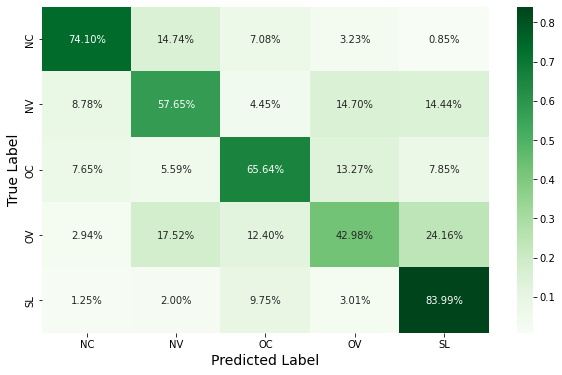

In [85]:
show_results_class(df_in=[], model=[], y_val=y_val_dnn_str, y_pred=y_pred_dnn_str, c_names=class_names)